In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

def noisy_Ev_theory(X,Y,Z,sigma):
    
    # Safe Expected Value
    EV_safe = X
    NEV_safe = EV_safe + np.random.normal()*sigma
    #RiskY Expected Value
    EV_risky = Y*Z
    NEV_risky = EV_risky + np.random.normal()*sigma
    #Compute binary choice
    choice = int(NEV_safe>NEV_risky)
    
   
    
    return EV_safe,EV_risky,NEV_safe,NEV_risky,choice

def EV_theory(X,Y,Z):
    
    # Safe Expected Value
    EV_safe = X
    #RiskY Expected Value
    EV_risky = Y*Z
    #Compute binary choice
    choice = int(EV_safe>EV_risky)
    
    return EV_safe,EV_risky,choice

def nev_theory(X,Y,Z,N,sigma):
   
    choice_list = np.empty(N)

    for i in range(N):
        EV_safe,EV_risky,NEV_safe,NEV_risky,choice = noisy_Ev_theory(X,Y,Z,sigma)
        choice_list[i]=choice
        
    p_safe = np.mean(choice_list)
    
    return p_safe,EV_safe,EV_risky

def softmax(delta,sigma):
    beta = (1/sigma)*np.sqrt(np.pi/2)
    
    p_safe = 1 / (1+ np.exp(beta*-delta))
    return p_safe

def simulate_noisy_value_theory(EV_safe,EV_risky,n_subjects,sigma):
    
    #initiate storing array
    risk = np.empty((n_subjects,10))
    
    #loop through subjects
    for subject in range(n_subjects):
        
        #loop through questions
        for index in range(10):
            NEV_safe = EV_safe[index] + np.random.normal()*sigma
            NEV_risky = EV_risky[index] + np.random.normal()*sigma
            risk[subject,index] = int(NEV_safe>NEV_risky)
    
    return risk 
    
    
def compute_summed_square_error(sigma,EV_safe,EV_risky,p_safe):
    
    model_point = softmax(EV_safe - EV_risky,sigma)
    
    error = p_safe-model_point
    
    return np.sum(np.power(error,2))

def loglikelihood(sigma, EV_safe,EV_risky,risk):

    beta = (1/sigma)*np.sqrt(np.pi/2)

    rows,cols = risk.shape
    p_data_given_sigma = np.empty_like(risk)

    for row in range(rows):
        for col in range(cols):
            if risk[row,col]== 0:
                p_data_given_sigma[row,col] = 1 - 1 / (1 + np.exp(beta*(EV_risky[col]-EV_safe[col])))
            else:
                p_data_given_sigma[row,col] = 1 / (1 + np.exp(beta*(EV_risky[col]-EV_safe[col])))

    return np.sum(np.log10(p_data_given_sigma))  


def loglike(sigma, EV_safe,EV_risky,risk):
    beta = (1/sigma)*np.sqrt(np.pi/2)

    rows,cols = risk.shape
    p_data_given_sigma = np.empty_like(risk)

    for row in range(rows):
        for col in range(cols):
            if risk[row,col]== 0:
                p_data_given_sigma[row,col] = 1 - 1 / (1 + np.exp(beta*(EV_risky[col]-EV_safe[col])))
            else:
                p_data_given_sigma[row,col] = 1 / (1 + np.exp(beta*(EV_risky[col]-EV_safe[col])))

    return -np.sum(np.log10(p_data_given_sigma))

def fit(EV_safe,EV_risky,simulated_data):
    x0=0.3
    options= {'maxiter': 400}
    res = minimize(loglike,
               x0,
              (EV_safe,EV_risky,simulated_data),
               options=options)
    return res
    

In [ ]:
#############################################
################  WEEK 6  ###################
#############################################

(-10.0, 10.0)

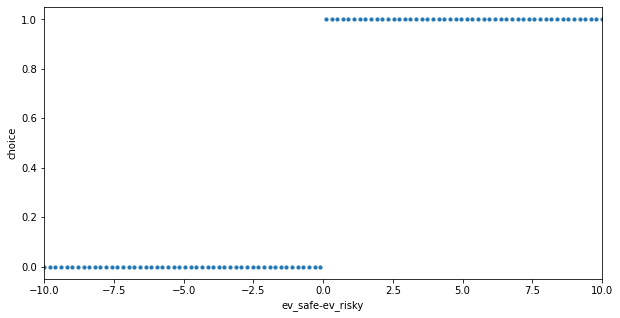

In [99]:
ev_safe = np.empty(100)
ev_risky= np.empty(100)
choice = np.empty(100)
    
for index,num in enumerate(np.linspace(0,1,100)):
    ev_safe[index],ev_risky[index],choice[index] = EV_theory(10,20,num)

plt.scatter(ev_safe-ev_risky,choice,s=10)
plt.xlabel("ev_safe-ev_risky")
plt.ylabel("choice")
plt.xlim((-10,10))

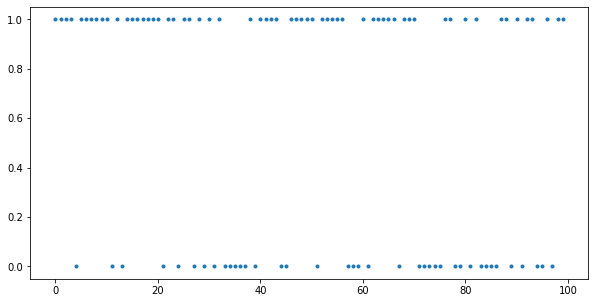

In [100]:
noisy_choice = np.empty(100)
for i in range(100):
    EV_safe,EV_risky,NEV_safe,NEV_risky,choice = noisy_Ev_theory(10,20,.25,10)
    noisy_choice[i]=choice
plt.plot(noisy_choice,marker=".",linestyle="none")

(0.0, 1.0)

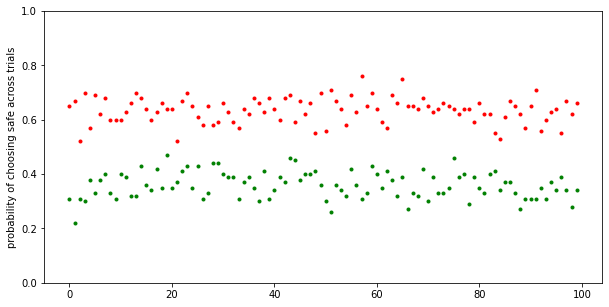

In [101]:
N=100
sigma=10

p_choice = np.empty((100,2))
for i in range(100):
    p_safe,EV_safe,EV_risky = nev_theory(10,20,.25,N,sigma)
    p_choice[i,0] = p_safe
    p_safe,EV_safe,EV_risky = nev_theory(10,20,.75,N,sigma)
    p_choice[i,1] = p_safe
plt.plot(p_choice[:,0],color = "red", marker=".",linestyle="none")
plt.plot(p_choice[:,1],color = "green", marker=".",linestyle="none")

plt.ylabel('probability of choosing safe across trials')
plt.ylim((0,1))

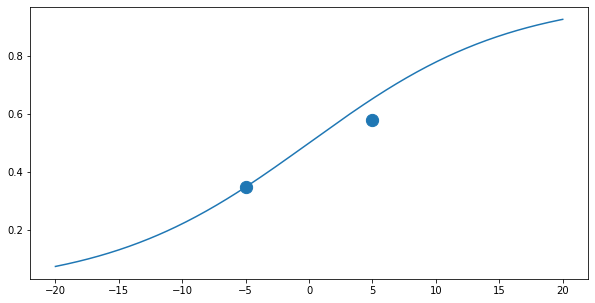

In [102]:
sigma=3
p_choice = np.empty(2)
ev_safe = np.empty(2)
ev_risky = np.empty(2)

p_choice[0],ev_safe[0],ev_risky[0] = nev_theory(10,20,.25,N,sigma)
p_choice[1],ev_safe[1],ev_risky[1] = nev_theory(10,20,.75,N,sigma)
plt.scatter(ev_safe-ev_risky,p_choice,s=150)

delta = np.linspace(-20,20,401)
plt.plot(delta,softmax(delta,sigma))


In [ ]:
#############################################
################  WEEK 7-8  #################
#############################################

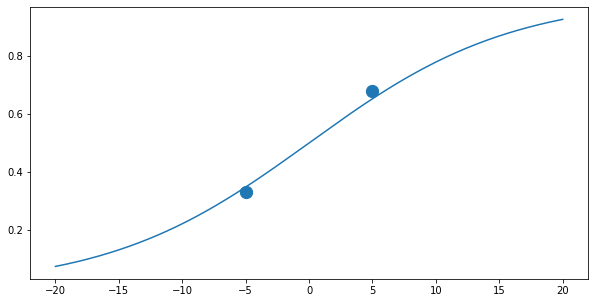

In [103]:
sigma-3
p_choice = np.empty(2)
ev_safe = np.empty(2)
ev_risky = np.empty(2)

p_choice[0],ev_safe[0],ev_risky[0] = nev_theory(10,20,.25,N,sigma)
p_choice[1],ev_safe[1],ev_risky[1] = nev_theory(10,20,.75,N,sigma)
plt.scatter(ev_safe-ev_risky,p_choice,s=150)

delta = np.linspace(-20,20,401)
plt.plot(delta,softmax(delta,sigma))

In [104]:
# SIMULATE DATA WITH REAL SIGMA OF 2.5
EV_safe=np.full(10,10)
EV_risky=np.array([0.5*20,0.25*19.74,0.26*23.12,0.58*11.93,0.50*16.04,0.62*14.41,0.28*35.52,0.58*18.79,0.71*16.88 ,0.34*38.04])

n_subjects = 100
risk = np.empty((100,10))
true_sigma=2.5

risk = simulate_noisy_value_theory(EV_safe,EV_risky,n_subjects,true_sigma)
p_safe = np.mean(risk,axis=0)


Text(0.5, 1.0, 'Distances between actual sigma = 2.5 and theoretical distribution of sigma = 1')

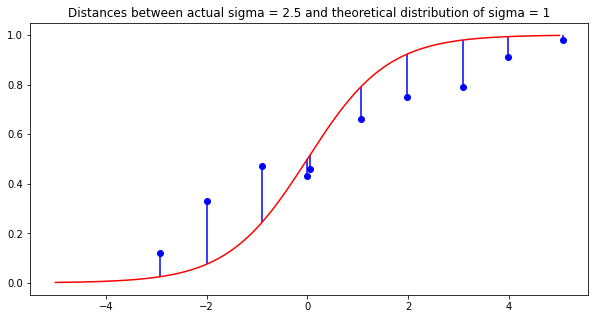

In [105]:
plt.scatter(EV_safe-EV_risky,p_safe,color="blue")
delta = np.linspace(-5,5,401)
plt.plot(delta,softmax(delta,sigma=1),color="red")

model_point = softmax(EV_safe-EV_risky,sigma=1)

plt.vlines(x=(EV_safe-EV_risky), ymin=model_point, ymax=p_safe, colors='blue')
plt.title("Distances between actual sigma = 2.5 and theoretical distribution of sigma = 1")

Text(0, 0.5, 'Sum of squared Error')

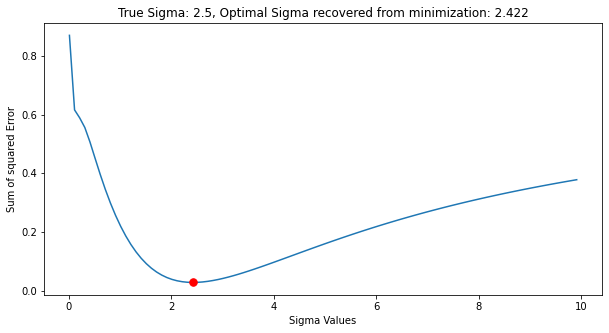

In [106]:
# Find parameter that minimizes sigma

from scipy.optimize import minimize

x0=0.1
options= {'maxiter': 400}

res = minimize(compute_summed_square_error,
               x0,
              (EV_safe,EV_risky,p_safe),
              method="TNC",
              options=options)


sigma_vals = np.arange(0.01,10,0.1)
error = [compute_summed_square_error(value,EV_safe,EV_risky,p_safe)for value in sigma_vals]
plt.plot(sigma_vals,error)
plt.plot(res.x,res.fun,marker=".",markersize=15,color="red")
plt.title("True Sigma: {}, Optimal Sigma recovered from minimization: {:.3f}".format(true_sigma,*res.x))
plt.xlabel("Sigma Values")
plt.ylabel("Sum of squared Error")


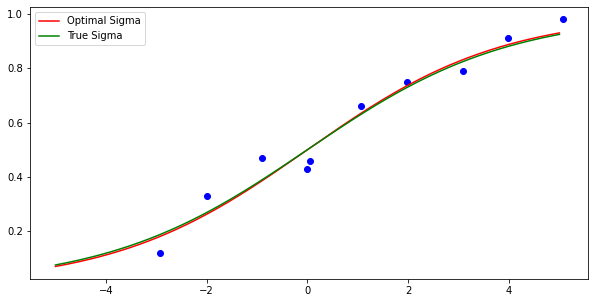

In [107]:
# Test recovered sigma parameter
plt.scatter(EV_safe-EV_risky,p_safe,color="blue")
plt.plot(delta,softmax(delta,sigma=res.x),color="red",label="Optimal Sigma")
plt.plot(delta,softmax(delta,sigma=true_sigma),color="green",label="True Sigma")
plt.legend()

In [ ]:
#############################################
################  WEEK 9  ##################
#############################################

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'Loglikelihood')

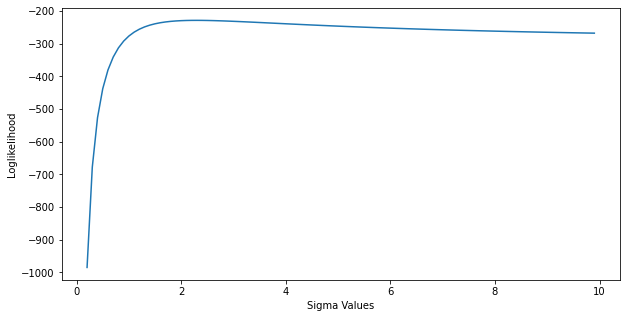

In [108]:
sigma_vals = np.arange(0.0001,10,0.1)
ll_array = np.array([loglikelihood(sigma,EV_safe,EV_risky,risk) for sigma in sigma_vals])
plt.plot(sigma_vals,ll_array)
plt.xlabel("Sigma Values")
plt.ylabel("Loglikelihood")


(1.0, 4.0)

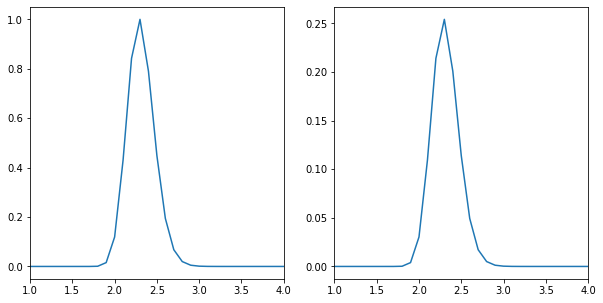

In [109]:
k = -max(ll_array)
posterior = 10**(ll_array+k)
normalized_posterior = posterior/np.sum(posterior)
fig,ax = plt.subplots(1,2)
ax[0].plot(sigma_vals,posterior)
ax[0].set_xlim([1,4])
ax[1].plot(sigma_vals,normalized_posterior)
ax[1].set_xlim([1,4])

In [ ]:
#############################################
################  WEEK 10  ##################
#############################################

In [110]:
from math import inf 
sigma_vals = np.arange(0.0001,10,0.1)
ll_array = np.array([loglikelihood(sigma,EV_safe,EV_risky,risk) for sigma in sigma_vals])
plt.plot(sigma_vals,ll_array)
plt.xlabel("Sigma Values")
plt.ylabel("Loglikelihood")

x0=0.6
options= {'maxiter': 400}
res = minimize(loglike,
               x0,
              (EV_safe,EV_risky,risk),
               method="TNC",
               options=options)

plt.plot(res.x,-res.fun,marker=".",markersize=20,color="red")
plt.title("Optimal sigma recovered at {:.3f}".format(*res.x))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'Optimal sigma recovered at 2.289')

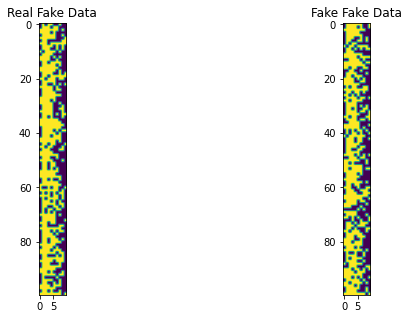

In [111]:
#simulate 100 more subjects with sigma = 3

fake_risk = simulate_noisy_value_theory(EV_safe,EV_risky,n_subjects=100,sigma=3)

fig,ax=plt.subplots(1,2)
ax[0].imshow(risk)
ax[0].title.set_text("Real Fake Data")
ax[1].imshow(fake_risk)
ax[1].title.set_text("Fake Fake Data")


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'Optimal sigma recovered at 2.866')

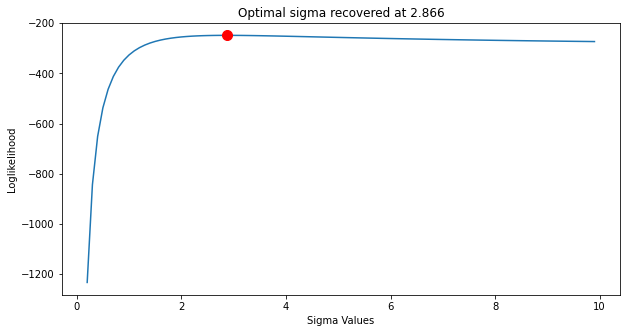

In [112]:
from math import inf 
sigma_vals = np.arange(0.0001,10,0.1)
ll_array = np.array([loglikelihood(sigma,EV_safe,EV_risky,fake_risk) for sigma in sigma_vals])
plt.plot(sigma_vals,ll_array)
plt.xlabel("Sigma Values")
plt.ylabel("Loglikelihood")

x0=0.3
options= {'maxiter': 400}
res = minimize(loglike,
               x0,
              (EV_safe,EV_risky,fake_risk),
               method="TNC",
               options=options)
plt.plot(res.x,-res.fun,marker=".",markersize=20,color="red")
plt.title("Optimal sigma recovered at {:.3f}".format(*res.x))


Text(0, 0.5, 'Fit noise')

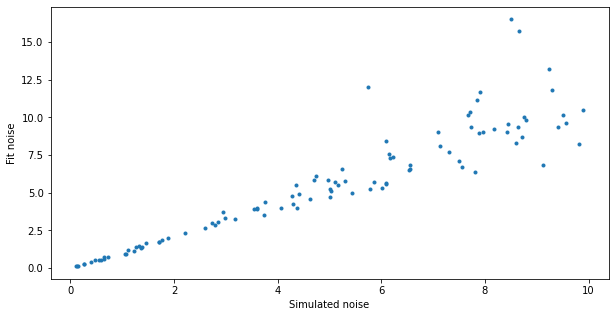

In [123]:
sigmas = [np.random.rand()*10 for _ in range(100)]

fits = np.empty_like(sigmas)

for i,sigma in enumerate(sigmas):
    risk = simulate_noisy_value_theory(EV_safe,EV_risky,100,sigma)
    res = fit(EV_safe,EV_risky,risk)
    fits[i] = res.x

plt.plot(sigmas,fits,marker=".",linestyle="none")
plt.xlabel("Simulated noise")
plt.ylabel("Fit noise")